# Dow Component Performance

Display the trailing `n` day performance of the components of the dow index.

## Preliminaries

Import packages. Use `pandas_datareader.data` for accessing `Yahoo` prices.

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors

set up array of Dow components.

In [2]:
components= ["MMM", "AXP", "AAPL", "BA", "CAT", "CVX", "CSCO", "KO",
             "DWDP", "XOM", "GE", "GS", "HD", "IBM", "INTC", "JNJ",
             "JPM", "MCD", "MRK", "MSFT", "NKE", "PFE", "PG", "TRV",
             "UNH", "UTX", "VZ", "V", "WMT", "DIS"]

set up the date range for the plot.

In [3]:
today = datetime.date.today()
start = today - datetime.timedelta(days=100)

## Download prices

Using `quandl` get a dataframe with the `n` days for price history.
Keep the `AdjClose` for calculating the daily returns.

In [4]:
def collect(components):
    ss = {}
    for ticker in components:
        s = web.DataReader('WIKI/' + ticker, 'quandl', start=start)['AdjClose']
        s = s.rename(ticker)
        ss[ticker] = s
    return pd.DataFrame(ss)

In [5]:
data = collect(components)

## Calculate daily cumulative returns

Ignoring holidays, first calculate the daily percent return; add 1 to get the return ratio.
Take the `log` of the ratios and sort into reverse chronological order and then compound the results.
Normalized these results so the latest cumulative return ratio is 1.

In [6]:
returns = data.dropna(how='all').sort_index().pct_change()[1:].add(1)
returns.applymap(np.log).sort_index(ascending=False)
cumret = returns.cumprod()
cumret = cumret / cumret.tail(1).values[0,:]

## Plot returns

Plot returns with a label on each line as well as an off-chart legend.
`tickers` is the list of tickers to be plotted.
`cmap` is the colormap used to pick the colors of the lines.
Colormaps are indexed from 0 to 1.
`y0` is the first row in the dataframe - the initial values.
`x0` is the first row time index.

For each ticker: `ticker` is the cumulative returns and `l` is the ticker label.
Set `use_index=True` in `plot()` to use the index as the x axis.
Use `text()` to label each line along the y axis.

Tickers are sorted by performance over the whole period: green for better performance and red for lower performance.

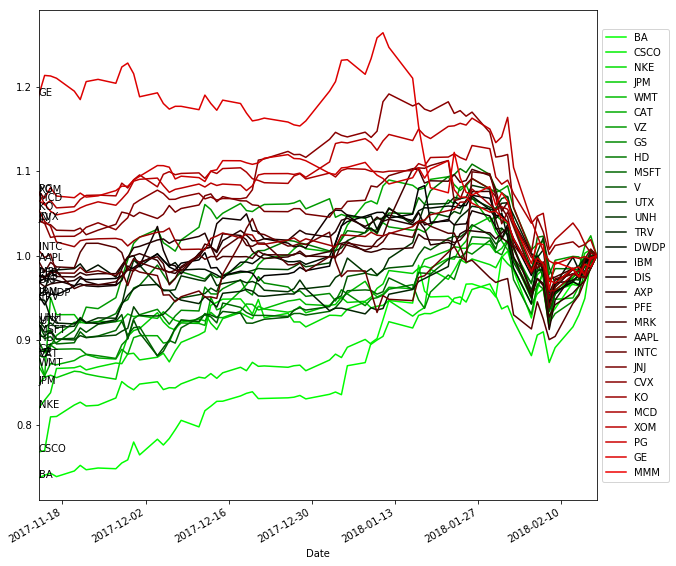

In [7]:
def plotcumret(cumret=cumret):
    tickers = len(cumret.columns.values)

    fig, ax = plt.subplots(figsize=(10, 10))
    cmap = colors.LinearSegmentedColormap('red-green', {
        'red':   ((0.0, 0.0, 0.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 1.0, 1.0)),
        'blue':  ((0.0, 0.0, 0.0),
                  (1.0, 0.0, 0.0)),
        'green': ((0.0, 0.0, 1.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 0.0, 0.0))
    })
    y0 = cumret.head(1).values[0]
    x0 = cumret.index[0]
    i = 0
    for idx in sorted(range(len(y0)), key=lambda k: y0[k]):
        ticker = cumret.columns.values[idx]
        l = cumret.columns[idx]
        ax = cumret.plot(ax=ax, kind='line', y=ticker, c=cmap(i/tickers), label=l, use_index=True)
        if y0[idx] == y0[idx]:
            plt.text(x0, y0[idx], l)
        i = i + 1
        

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close('all')
plotcumret()